# Retreiving static metro data via LAMetro API

In [1]:
from collections import defaultdict
import json, requests
import pprint
import math
#from collections import namedtuple
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np
import pickle
%matplotlib inline

In [2]:
#Getting all agencies
res = requests.get("https://api.metro.net/agencies/")
print(res.json())



[{'id': 'lametro', 'localtime': '2020-08-21 02:08:14.491921', 'display_name': 'Los Angeles Metro'}, {'id': 'lametro-rail', 'localtime': '2020-08-21 02:08:14.491939', 'display_name': 'Los Angeles Metro Rail'}]


In [5]:
#LA Metro agency
agency = 'lametro-rail'

In [6]:
#Getting the routes
res = requests.get(f"https://api.metro.net/agencies/{agency}/routes/")
print(res.json())


{'items': [{'display_name': 'Metro A Line (blue)', 'id': '801'}, {'display_name': 'Metro B Line (red)', 'id': '802'}, {'display_name': 'Metro C Line (green)', 'id': '803'}, {'display_name': 'Metro L Line (gold)', 'id': '804'}, {'display_name': 'Metro D Line (purple)', 'id': '805'}, {'display_name': 'Metro E Line (expo)', 'id': '806'}]}


In [7]:
#Storing the routes

routes = {}
for route in res.json()['items']:
    route_data = route['display_name'].split()
    routes[route['id']] = {'name': route_data[1], 'color': route_data[3].lstrip('(').rstrip(')')}
pprint.pprint(routes)

print("")
route_tags = list(routes.keys())
routes['806']['color'] = 'cyan'
pprint.pprint(route_tags)

{'801': {'color': 'blue', 'name': 'A'},
 '802': {'color': 'red', 'name': 'B'},
 '803': {'color': 'green', 'name': 'C'},
 '804': {'color': 'gold', 'name': 'L'},
 '805': {'color': 'purple', 'name': 'D'},
 '806': {'color': 'expo', 'name': 'E'}}

['801', '802', '803', '804', '805', '806']


In [8]:
#Getting the runs for each route
for route in routes:
    res = requests.get(f"https://api.metro.net/agencies/{agency}/routes/{route}/runs/")
    print(res.json())
    print("***********")
    print()


{'items': [{'display_name': '801 - Downtown Long Beach Station', 'direction_name': '1', 'display_in_ui': True, 'route_id': '801_1_var0', 'id': '801_1_var0'}, {'display_name': '801 - 7th Street / Metro Center Station', 'direction_name': '0', 'display_in_ui': True, 'route_id': '801_0_var0', 'id': '801_0_var0'}]}
***********

{'items': [{'display_name': '802 - Union Station / Downtown La', 'direction_name': '0', 'display_in_ui': True, 'route_id': '802_0_var0', 'id': '802_0_var0'}, {'display_name': '802 - North Hollywood Station', 'direction_name': '1', 'display_in_ui': True, 'route_id': '802_1_var0', 'id': '802_1_var0'}]}
***********

{'items': [{'display_name': '803 - Norwalk Station', 'direction_name': '0', 'display_in_ui': True, 'route_id': '803_0_var0', 'id': '803_0_var0'}, {'display_name': '803 - Redondo Beach Station', 'direction_name': '1', 'display_in_ui': True, 'route_id': '803_1_var0', 'id': '803_1_var0'}]}
***********

{'items': [{'id': '804_0_var0', 'direction_name': '0', 'dis

In [10]:
#Storing the runs for each route
for route in routes:
    res = requests.get(f"https://api.metro.net/agencies/{agency}/routes/{route}/runs/")
    routes[route]['run_id'] = {}
    for run in res.json()['items']:
        routes[route]['run_id'][run['direction_name']] =  run['id']
pprint.pprint(routes)

{'801': {'color': 'blue',
         'name': 'A',
         'run_id': {'0': '801_0_var0', '1': '801_1_var0'}},
 '802': {'color': 'red',
         'name': 'B',
         'run_id': {'0': '802_0_var0', '1': '802_1_var0'}},
 '803': {'color': 'green',
         'name': 'C',
         'run_id': {'0': '803_0_var0', '1': '803_1_var0'}},
 '804': {'color': 'gold',
         'name': 'L',
         'run_id': {'0': '804_0_var0', '1': '804_1_var0'}},
 '805': {'color': 'purple',
         'name': 'D',
         'run_id': {'0': '805_0_var0', '1': '805_1_var0'}},
 '806': {'color': 'cyan',
         'name': 'E',
         'run_id': {'0': '806_0_var0', '1': '806_1_var0'}}}


In [8]:
#Getting the sequence of stops for each route
for route in routes:
    res = requests.get(f"https://api.metro.net/agencies/{agency}/routes/{route}/sequence/")
    print(res.json())
    print("***********")
    print()


{'items': [{'id': '80122', 'display_name': '7th Street / Metro Center Station - Metro A Line (Blue) & E Line (Expo)', 'latitude': 34.0486099, 'longitude': -118.25882}, {'id': '80121', 'display_name': 'Pico Station', 'latitude': 34.0407299, 'longitude': -118.26612}, {'id': '80120', 'display_name': 'Grand / Lattc Station', 'latitude': 34.0331599, 'longitude': -118.26933}, {'id': '80119', 'display_name': 'San Pedro Street Station', 'latitude': 34.0268099, 'longitude': -118.2555}, {'id': '80118', 'display_name': 'Washington Station', 'latitude': 34.0196499, 'longitude': -118.24308}, {'id': '80117', 'display_name': 'Vernon Station', 'latitude': 34.0029199, 'longitude': -118.2433}, {'id': '80116', 'display_name': 'Slauson Station', 'latitude': 33.9887599, 'longitude': -118.2434}, {'id': '80115', 'display_name': 'Florence Station', 'latitude': 33.9737399, 'longitude': -118.24327}, {'id': '80114', 'display_name': 'Firestone Station', 'latitude': 33.9596099, 'longitude': -118.2432}, {'id': '801

{'items': [{'display_name': 'Union Station - Metro Red & Purple Lines', 'longitude': -118.23425, 'latitude': 34.0561999, 'id': '80214'}, {'display_name': 'Civic Center / Grand Park Station', 'longitude': -118.24606, 'latitude': 34.0548999, 'id': '80213'}, {'display_name': 'Pershing Square Station', 'longitude': -118.25126, 'latitude': 34.0493199, 'id': '80212'}, {'display_name': '7th Street / Metro Center Station - Metro Red & Purple Lines', 'longitude': -118.25868, 'latitude': 34.0486299, 'id': '80211'}, {'display_name': 'Westlake / Macarthur Park Station', 'longitude': -118.27488, 'latitude': 34.0563699, 'id': '80210'}, {'display_name': 'Wilshire / Vermont Station', 'longitude': -118.29008, 'latitude': 34.0626999, 'id': '80209'}, {'display_name': 'Wilshire / Normandie Station', 'longitude': -118.30146, 'latitude': 34.0617499, 'id': '80215'}, {'display_name': 'Wilshire / Western Station', 'longitude': -118.30876, 'latitude': 34.0616899, 'id': '80216'}]}
***********

{'items': [{'displ

In [9]:
#Storing the sequence of stops for each route
stops = {}
for route in routes:
    res = requests.get(f"https://api.metro.net/agencies/{agency}/routes/{route}/sequence/")
    stops[route] = []
    for stop_details in res.json()['items']:
        stops[route].append(stop_details)
pprint.pprint(stops)

{'801': [{'display_name': '7th Street / Metro Center Station - Metro A Line '
                          '(Blue) & E Line (Expo)',
          'id': '80122',
          'latitude': 34.0486099,
          'longitude': -118.25882},
         {'display_name': 'Pico Station',
          'id': '80121',
          'latitude': 34.0407299,
          'longitude': -118.26612},
         {'display_name': 'Grand / Lattc Station',
          'id': '80120',
          'latitude': 34.0331599,
          'longitude': -118.26933},
         {'display_name': 'San Pedro Street Station',
          'id': '80119',
          'latitude': 34.0268099,
          'longitude': -118.2555},
         {'display_name': 'Washington Station',
          'id': '80118',
          'latitude': 34.0196499,
          'longitude': -118.24308},
         {'display_name': 'Vernon Station',
          'id': '80117',
          'latitude': 34.0029199,
          'longitude': -118.2433},
         {'display_name': 'Slauson Station',
          'id': '8

# A map plot of the LAMetro-rail routes

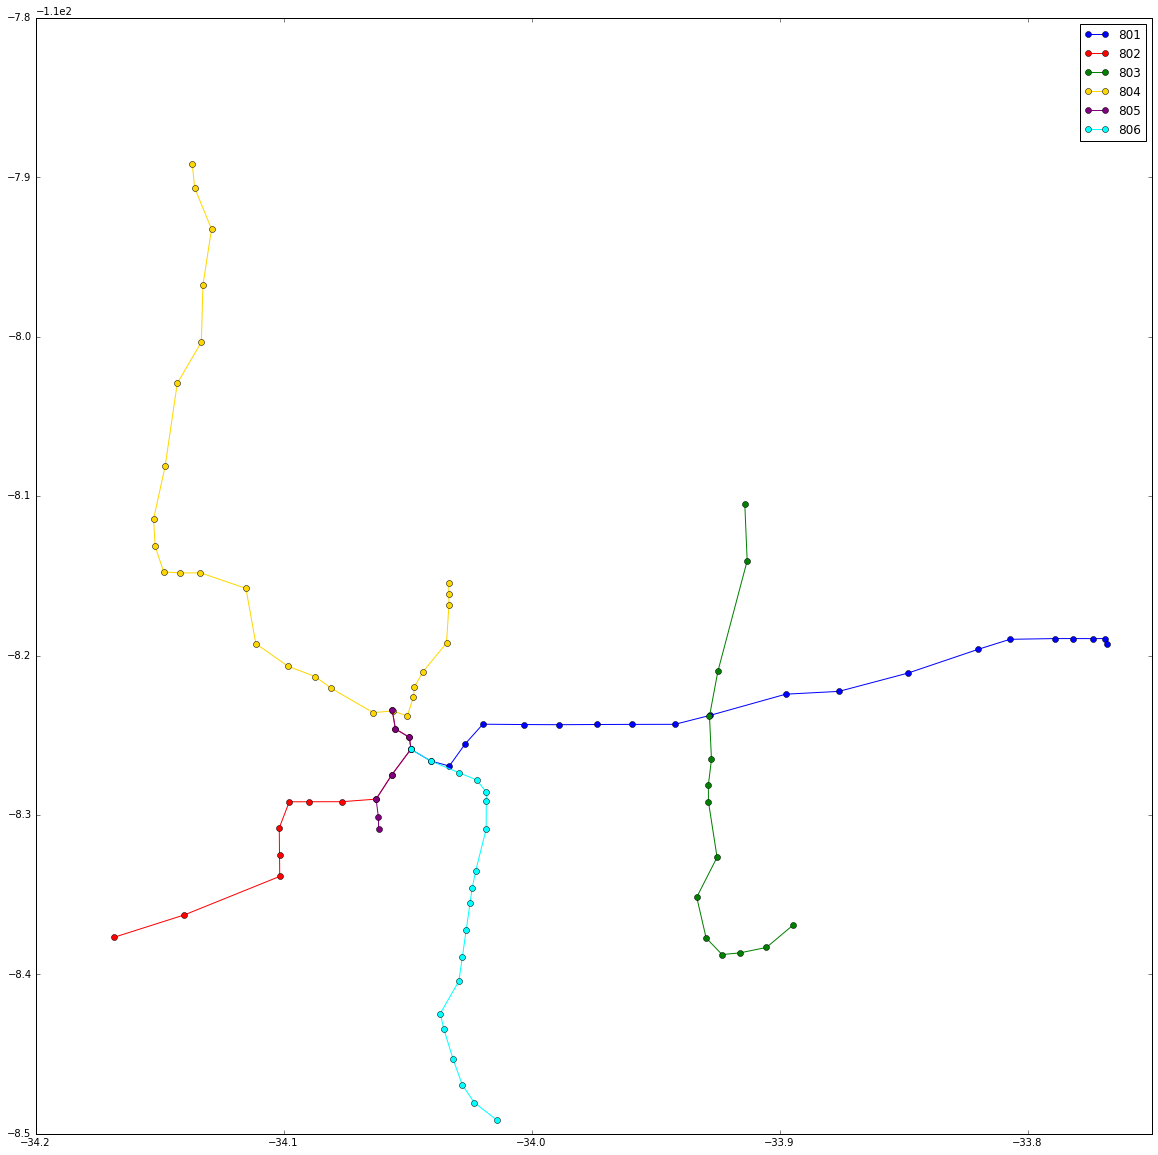

In [10]:
lametro_map =plt.figure(figsize=(20,20))
for route in stops:
    current_color = routes[route]['color']
    latitudes = []
    longitudes = []
    for stop in stops[route]:
        #Horizontal flip to align with the other map
        latitudes.append(-1*stop['latitude'])
        longitudes.append(stop['longitude'])
    plt.plot(latitudes,longitudes, color=current_color, linestyle="solid", marker="o", label=route)
plt.legend();


Compare it to a screenshot of the 2-D map available from the official LA-metro site

<img src="LAMetro-map-screenshot.png" style="width:400px" />

In [11]:
#Computing distances between each stop and the previous stop for each route
# (prev-current is in direction 0)
stop_coordinates_and_distances = {}
for route in stops:
    stop_coordinates_and_distances[route] = {}
    stop_sequence = [stops[route][0]['id']]
    stop_sequence_coordinates = [(stops[route][0]['latitude'], stops[route][0]['longitude'])]
    prev_stop_coordinates = np.array(list(stop_sequence_coordinates[0]))
    stop_distances = []
    widths_between_stops = []
    heights_between_stops = []
    for stop_details in stops[route][1:]:
        stop_sequence.append(stop_details['id'])
        stop_sequence_coordinates.append((stop_details['latitude'],stop_details['longitude']))
        current_stop_coordinates = np.array(list(stop_sequence_coordinates[-1]))
        distance = np.linalg.norm(current_stop_coordinates-prev_stop_coordinates)
        delta_width = stop_sequence_coordinates[-1][0]- stop_sequence_coordinates[-2][0]
        delta_height = stop_sequence_coordinates[-1][1]- stop_sequence_coordinates[-2][1]
        stop_distances.append(distance)
        widths_between_stops.append(delta_width)
        heights_between_stops.append(delta_height)
        prev_stop_coordinates = current_stop_coordinates
        
    stop_coordinates_and_distances[route]['no_of_stops'] = len(stop_sequence)     
    stop_coordinates_and_distances[route]['stop_sequence'] = stop_sequence
    stop_coordinates_and_distances[route]['stop_coordinates'] = stop_sequence_coordinates
    stop_coordinates_and_distances[route]['stop_distances'] = stop_distances
    stop_coordinates_and_distances[route]['widths_between_stops'] = widths_between_stops
    stop_coordinates_and_distances[route]['heights_between_stops'] = heights_between_stops

    

In [12]:
#Range of distances between consecutive stops


for route in stop_coordinates_and_distances:
    minimum_consecutive_distance = min(stop_coordinates_and_distances[route]['stop_distances'])
    maximum_consecutive_distance = max(stop_coordinates_and_distances[route]['stop_distances'])
    stop_coordinates_and_distances[route]['min_consecutive_distance'] = minimum_consecutive_distance
    stop_coordinates_and_distances[route]['max_consecutive_distance'] = maximum_consecutive_distance
    stop_coordinates_and_distances[route]['end_to_end'] = sum(stop_coordinates_and_distances[route]['stop_distances'])
    print(f"Route {route}")
    print(f"min consecutive = {minimum_consecutive_distance}, max consecutive ={maximum_consecutive_distance}")
    print(f"end to end = {stop_coordinates_and_distances[route]['end_to_end']}")
    print()
    



Route 801
min consecutive = 0.003622499137343108, max consecutive =0.033328720347473625
end to end = 0.31438282845947363

Route 802
min consecutive = 0.007452013150816495, max consecutive =0.04540512085657395
end to end = 0.2209700046261227

Route 803
min consecutive = 0.007213910174100862, max consecutive =0.07033855059637988
end to end = 0.32373748913372535

Route 804
min consecutive = 0.0063033483165620355, max consecutive =0.05223937403912474
end to end = 0.4960366022114363

Route 805
min consecutive = 0.0073002465711790535, max consecutive =0.0179540413277875
end to end = 0.08009994964920097

Route 806
min consecutive = 0.005810008605842361, max consecutive =0.026504884455519396
end to end = 0.2542814340875917



In [13]:
#Scaling distances between each stop and the previous stop for each route
# (prev-current is in direction 0)
#end_to_end units-> s inches, d units -> ds/end_to_end 

screen_width = 10

for route in stop_coordinates_and_distances:
    stop_distances = stop_coordinates_and_distances[route]['stop_distances'] 
    end_to_end = stop_coordinates_and_distances[route]['end_to_end']
    stop_coordinates_and_distances[route]['scaled_distances'] = list(map(lambda x: round(x*screen_width/end_to_end, 3),stop_distances))    

In [14]:
for route in stop_coordinates_and_distances:
    print(f"Route {route}")
    print(stop_coordinates_and_distances[route]['scaled_distances'])
    print(f"sum of scaled distances ={sum(stop_coordinates_and_distances[route]['scaled_distances'])}")
    print()

Route 801
[0.342, 0.262, 0.484, 0.456, 0.532, 0.45, 0.478, 0.449, 0.553, 0.485, 1.06, 0.683, 0.958, 1.019, 0.453, 0.572, 0.231, 0.262, 0.155, 0.115]
sum of scaled distances =9.998999999999999

Route 802
[1.439, 2.055, 0.605, 0.772, 0.763, 0.353, 0.606, 0.63, 0.745, 0.813, 0.337, 0.345, 0.538]
sum of scaled distances =10.001000000000001

Route 803
[0.541, 0.349, 0.223, 0.379, 0.797, 0.814, 1.081, 0.328, 0.492, 0.84, 0.875, 2.173, 1.109]
sum of scaled distances =10.001

Route 804
[0.136, 0.14, 0.485, 0.408, 0.206, 0.127, 0.246, 0.136, 0.159, 0.464, 0.193, 0.258, 0.386, 0.705, 0.419, 0.169, 0.131, 0.332, 0.344, 0.675, 1.053, 0.554, 0.722, 0.712, 0.539, 0.303]
sum of scaled distances =10.001999999999999

Route 805
[1.483, 0.952, 0.93, 2.241, 2.056, 1.426, 0.911]
sum of scaled distances =9.998999999999999

Route 806
[0.422, 0.543, 0.327, 0.336, 0.228, 0.683, 1.042, 0.437, 0.358, 0.67, 0.666, 0.603, 0.852, 0.384, 0.749, 0.654, 0.481, 0.563]
sum of scaled distances =9.998000000000001



In [15]:
pprint.pprint(stop_coordinates_and_distances)

{'801': {'end_to_end': 0.31438282845947363,
         'heights_between_stops': [-0.00730000000000075,
                                   -0.0032099999999957163,
                                   0.013829999999998677,
                                   0.01241999999999166,
                                   -0.00021999999999877673,
                                   -9.99999999891088e-05,
                                   0.0001299999999986312,
                                   6.999999999379725e-05,
                                   3.999999999848569e-05,
                                   0.005610000000004334,
                                   0.013300000000000978,
                                   0.0017500000000012506,
                                   0.011479999999991719,
                                   0.014930000000006771,
                                   0.00625999999999749,
                                   0.0004500000000007276,
                                   

# A linearized representation of the LA-Metro rail routes

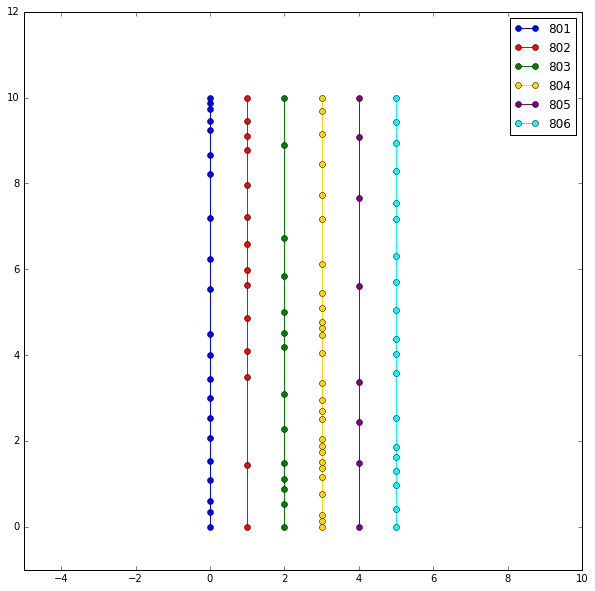

In [16]:
linearized_map =plt.figure(figsize=(10,10))
for i, route in enumerate(stops):
    current_color = routes[route]['color']
    xs = [i]
    ys = [0]
    stop_distances = stop_coordinates_and_distances[route]['scaled_distances']
    for distance in stop_distances:
        xs.append(xs[-1])
        ys.append(ys[-1]+distance)
    plt.plot(xs, ys, color=current_color, linestyle="solid", marker="o", label=route)
plt.xlim(-5,10)
plt.ylim(-1,12)
plt.legend();



# Current vehicular data

In [17]:
#Getting the current vehicular data 
res = requests.get(f"https://api.metro.net/agencies/{agency}/vehicles/")
#print(res.json())
pprint.pprint(res.json()['items'][0])
for vehicle in res.json()['items']:
    print(f"Heading {vehicle['heading']}")


{'heading': 90.0,
 'id': '204',
 'latitude': 34.0619439,
 'longitude': -118.298029,
 'predictable': True,
 'route_id': '805',
 'run_id': '805_0_var0',
 'seconds_since_report': 6}
Heading 90.0
Heading 180.0
Heading 180.0
Heading 270.0
Heading 270.0
Heading 180.0
Heading 270.0
Heading 0.0
Heading 270.0
Heading 0.0
Heading 180.0
Heading 0.0
Heading 0.0
Heading 180.0
Heading 0.0
Heading 0.0
Heading 0.0
Heading 0.0
Heading 180.0
Heading 90.0
Heading 0.0
Heading 180.0
Heading 90.0
Heading 180.0
Heading 180.0
Heading 0.0
Heading 0.0
Heading 270.0
Heading 90.0
Heading 0.0
Heading 0.0
Heading 90.0
Heading 180.0
Heading 90.0
Heading 180.0
Heading 180.0
Heading 0.0


In [18]:
#Storing current vehicular data
current_vehicles = {}
route_wise_current_vehicles = {}
for route in routes:
    route_wise_current_vehicles[route] = defaultdict(list)
res = requests.get(f"https://api.metro.net/agencies/{agency}/vehicles/")
for vehicle in res.json()['items']:
    vehicle_id = vehicle['id']
    current_vehicles[vehicle_id] = vehicle.copy()
    current_route = vehicle['route_id']
    route_wise_current_vehicles[current_route]['latitudes'].append(vehicle['latitude'])
    route_wise_current_vehicles[current_route]['longitudes'].append(vehicle['longitude'])
    route_wise_current_vehicles[current_route]['vehicle_coordinates'].append((vehicle['latitude'],vehicle['longitude']))
    route_wise_current_vehicles[current_route]['run_id'].append(vehicle['run_id'])
for route in routes:
    route_wise_current_vehicles[route]['no_of_vehicles'] = len(route_wise_current_vehicles[route]['longitudes'])
print(f"Number of current vehicles = {len(current_vehicles)}")
print()
print("*********")
pprint.pprint(current_vehicles)
pprint.pprint(route_wise_current_vehicles)

Number of current vehicles = 37

*********
{'102': {'heading': 0.0,
         'id': '102',
         'latitude': 33.790072,
         'longitude': -118.189292,
         'predictable': True,
         'route_id': '801',
         'run_id': '801_0_var0',
         'seconds_since_report': 94},
 '103': {'heading': 0.0,
         'id': '103',
         'latitude': 34.049217,
         'longitude': -118.258267,
         'predictable': True,
         'route_id': '801',
         'run_id': '801_1_var0',
         'seconds_since_report': 13},
 '105': {'heading': 180.0,
         'id': '105',
         'latitude': 33.807505,
         'longitude': -118.190021,
         'predictable': True,
         'route_id': '801',
         'run_id': '801_1_var0',
         'seconds_since_report': 41},
 '106': {'heading': 180.0,
         'id': '106',
         'latitude': 34.034068,
         'longitude': -118.270511,
         'predictable': True,
         'route_id': '801',
         'run_id': '801_1_var0',
         'seconds_s

# Rough display of current vehicles in the map plot 

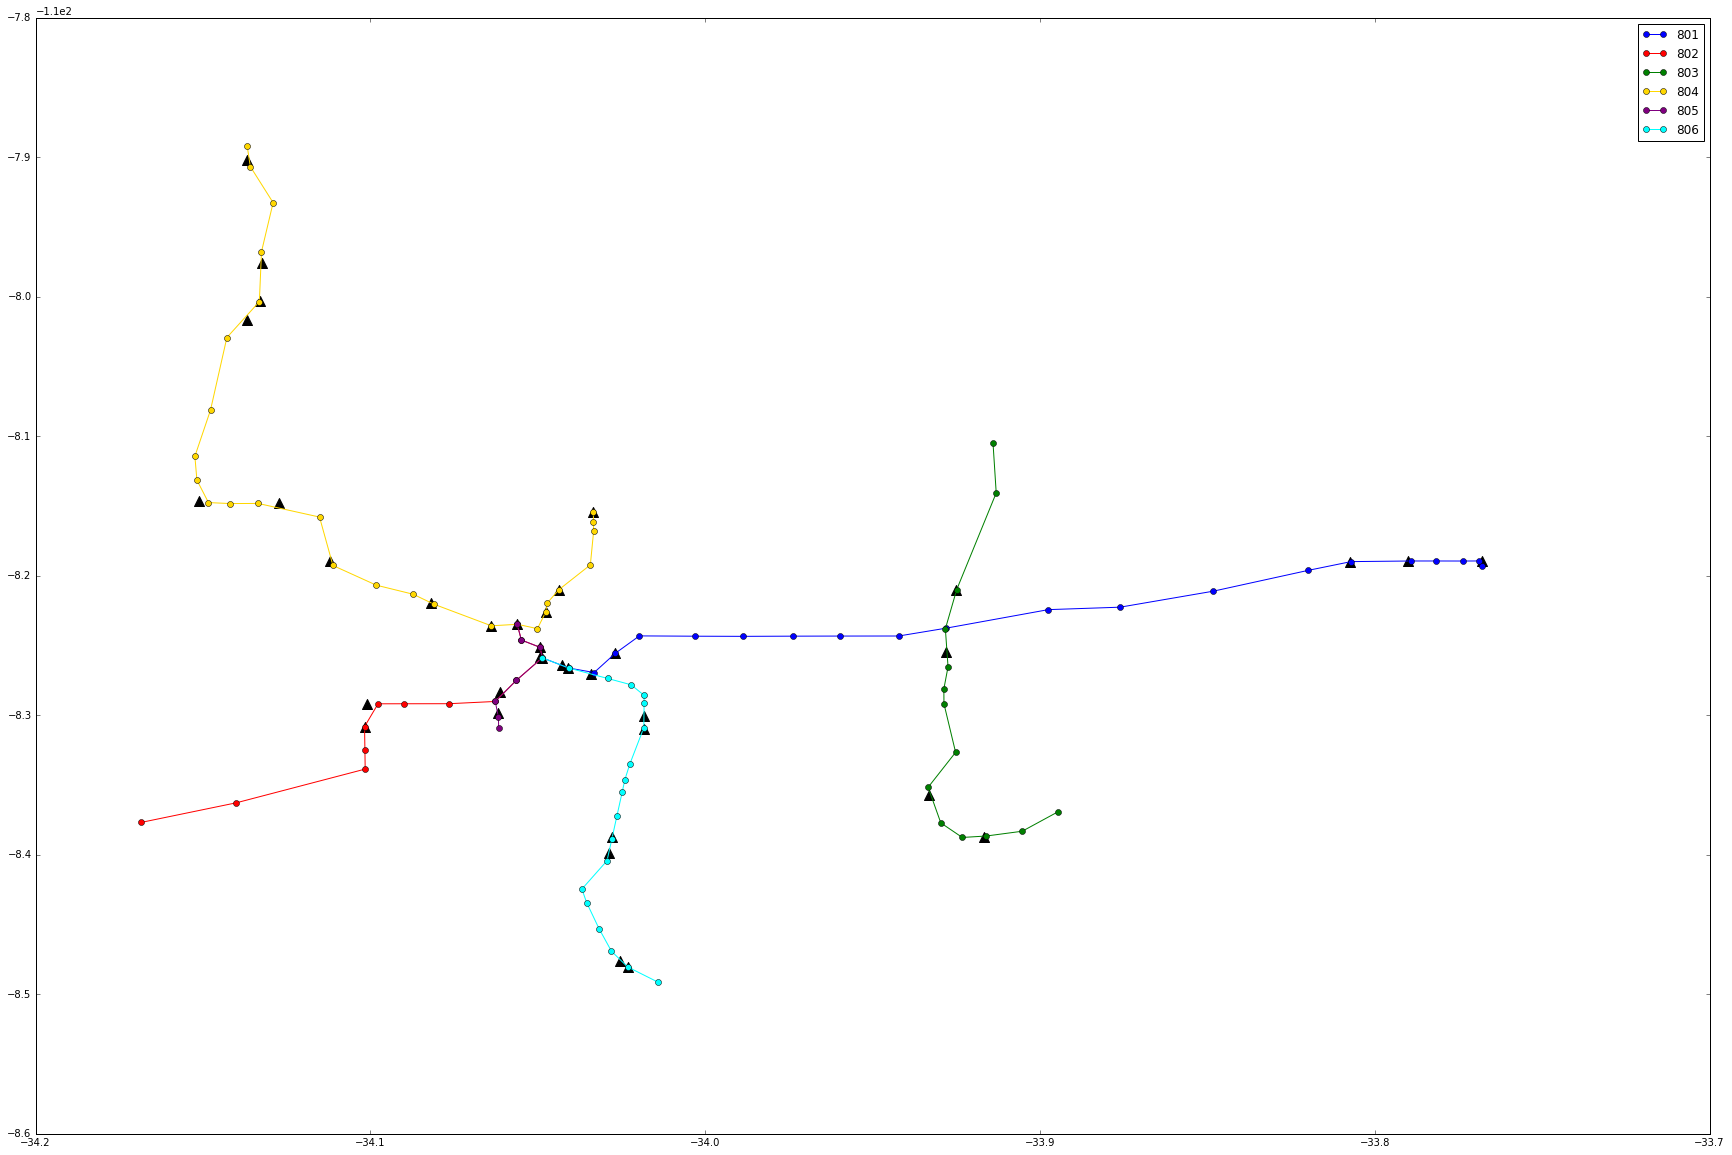

In [19]:
lametro_map_with_current_vehicles =plt.figure(figsize=(30,20))
for route in routes:
    current_color = routes[route]['color']
    latitudes = []
    longitudes = []
    for stop in stops[route]:
        #Horizontal flip to align with the other map
        latitudes.append(-1*stop['latitude'])
        longitudes.append(stop['longitude'])
    current_vehicles_latitudes = list(map(lambda x: -1*x, route_wise_current_vehicles[route]['latitudes']))
    current_vehicles_longitudes = route_wise_current_vehicles[route]['longitudes']
    plt.plot(latitudes,longitudes, color=current_color, linestyle='solid', marker="o", label=route)
    plt.scatter(current_vehicles_latitudes, current_vehicles_longitudes, color ="black", marker ="^", s=100)
plt.legend();






# Pickling the retrieved data
                  

In [20]:
#Open the blank file where you'd like to save your data in append mode (binary format)
static_LAmetro_data_fileobj = open('static_LAmetro_data', 'ab') 

#Collect all data to be pickled into one container
static_data = {'routes': routes, 'stops': stops, 
               'stop_coordinates_and_distances' : stop_coordinates_and_distances,
               'current_vehicles' : current_vehicles,
              'route_wise_current_vehicles' : route_wise_current_vehicles}

# Dump pickled data 
pickle.dump(static_data,static_LAmetro_data_fileobj)

